In [2]:
#import stuff
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [15]:
#import a few to see what the data looks like
preview_calls_df = pd.read_csv(r'C:/Users/douge/Python Notebooks/SanFran/Fire_Department_Calls_for_Service.csv',nrows=500)

In [1]:
preview_calls_df.head()

NameError: name 'preview_calls_df' is not defined

In [16]:
preview_calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 44 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Call Number                                           500 non-null    int64  
 1   Unit ID                                               500 non-null    object 
 2   Incident Number                                       500 non-null    int64  
 3   Call Type                                             500 non-null    object 
 4   Call Date                                             500 non-null    object 
 5   Watch Date                                            500 non-null    object 
 6   Received DtTm                                         500 non-null    object 
 7   Entry DtTm                                            500 non-null    object 
 8   Dispatch DtTm                                         500 no

In [3]:
calls_df.iloc[:,19].describe()

NameError: name 'calls_df' is not defined

In [4]:
#will have to set the dtype for some of these rows on import cos it got mad at me last time
calls_df = pd.read_csv(r'C:/Users/douge/Python Notebooks/SanFran/Fire_Department_Calls_for_Service.csv',dtype={'Station Area':'string','Original Priority':'string','Call Type Group':'string'},nrows=1000000)

C:\Users\douge\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 44 columns):
 #   Column                                                Non-Null Count    Dtype  
---  ------                                                --------------    -----  
 0   Call Number                                           1000000 non-null  int64  
 1   Unit ID                                               1000000 non-null  object 
 2   Incident Number                                       1000000 non-null  int64  
 3   Call Type                                             1000000 non-null  object 
 4   Call Date                                             1000000 non-null  object 
 5   Watch Date                                            1000000 non-null  object 
 6   Received DtTm                                         1000000 non-null  object 
 7   Entry DtTm                                            1000000 non-null  object 
 8   Dispatch DtTm                    

Some questions to ask: 
    1. i should be able to calculate travel time for emergency vehicles vs. the distance they need to travel. I wonder if I can add in population density of those neighborhoods to see how response time varies according to population.
    2. Maybe a pre 1. step: are certain battalions just slower?
    3. what are peak times of day, days of week, days of month, months of year?
    4. would be interesting to map weather to incidents. 
    5. response times for type of call...
 

In [26]:
#import dictionary of terms
xlsfile = pd.ExcelFile(r'C:/Users/douge/Python Notebooks/SanFran/FIR-0002_DataDictionary_fire-calls-for-service.xlsx')

In [34]:
pd.set_option('max_colwidth', 150)

In [35]:
#parse dictionary of terms
dfex = xlsfile.parse('Copy')
dfex

,Field Name,Data Type,Definition
0,Call Number,Text,A unique 9-digit number assigned by the 911 Dispatch Center (DEM) to this call. These number are used for both Police and Fire calls.
1,Unit ID,Text,Unit Identifier. For example E01 for Engine 1 or T01 for Truck 1.
2,Incident Number,Text,A unique 8-digit number assigned by DEM to this Fire incident.
3,Call Date,Date & Time,Date the call is received at the 911 Dispatch Center. Used for reporting purposes.
4,Call Type,Text,Type of call the incident falls into. See the list below.
5,Watch Date,Date & Time,Watch date when the call is received. Watch date starts at 0800 each morning and ends at 0800 the next day.
6,Received DtTm,Date & Time,Date and time of call is received at the 911 Dispatch Center.
7,Entry DtTm,Date & Time,Date and time the 911 operator submits the entry of the initical call information into the CAD system
8,Dispatch DtTm,Date & Time,Date and time the 911 operator dispatches this unit to the call.
9,Response DtTm,Date & Time,Date and time this unit acknowledges the dispatch and records that the unit is en route to the location of the call.


In [6]:
#i got lots of negative numbers when trying to calculate the timedelta between when they acknowledged receipt of response ('Response DtTm'),
#and when they were on the scene ('On Scene DtTm'), so, removing nulls now so that doesn't happen
dropped_calls_df = calls_df[calls_df['On Scene DtTm'].notna()]

In [69]:
dropped_calls_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780210 entries, 0 to 999999
Data columns (total 44 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Call Number                                           780210 non-null  int64  
 1   Unit ID                                               780210 non-null  object 
 2   Incident Number                                       780210 non-null  int64  
 3   Call Type                                             780210 non-null  object 
 4   Call Date                                             780210 non-null  object 
 5   Watch Date                                            780210 non-null  object 
 6   Received DtTm                                         780210 non-null  object 
 7   Entry DtTm                                            780210 non-null  object 
 8   Dispatch DtTm                               

In [7]:
dropped2_calls_df = dropped_calls_df[calls_df['Response DtTm'].notna()]

C:\Users\douge\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [8]:
dropped2_calls_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731189 entries, 0 to 999999
Data columns (total 44 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Call Number                                           731189 non-null  int64  
 1   Unit ID                                               731189 non-null  object 
 2   Incident Number                                       731189 non-null  int64  
 3   Call Type                                             731189 non-null  object 
 4   Call Date                                             731189 non-null  object 
 5   Watch Date                                            731189 non-null  object 
 6   Received DtTm                                         731189 non-null  object 
 7   Entry DtTm                                            731189 non-null  object 
 8   Dispatch DtTm                               

In [9]:
#convert stuff to datetime
dropped2_calls_df['On Scene DtTm'] = pd.to_datetime(dropped2_calls_df['On Scene DtTm'], errors='coerce')
dropped2_calls_df['Received DtTm'] = pd.to_datetime(dropped2_calls_df['Received DtTm'], errors='coerce')
dropped2_calls_df['Response DtTm'] = pd.to_datetime(dropped2_calls_df['Response DtTm'], errors='coerce')

C:\Users\douge\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\douge\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\douge\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [10]:
# let's suppose travel time is the difference between when they acknowledged
#receipt of response ('Response DtTm') and when they were on the scene ('On Scene DtTm')
dropped2_calls_df['Travel Time'] = dropped2_calls_df['On Scene DtTm'] - dropped2_calls_df['Response DtTm']

C:\Users\douge\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
dropped2_calls_df['Travel Time'].describe()

count                    731189
mean     0 days 00:04:20.291902
std      0 days 02:35:21.633303
min          -93 days +19:19:23
25%             0 days 00:02:01
50%             0 days 00:03:06
75%             0 days 00:05:17
max             0 days 15:32:15
Name: Travel Time, dtype: object

In [11]:
#there are two columns with the same name; one contains the name, the other the corresponding number; let's rename the names one
dropped2_calls_df.rename(columns={'Neighborhooods - Analysis Boundaries':'Neighborhood Names'},inplace=True)

C:\Users\douge\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
mini_holder = calls_df[['Neighborhood Names','Neighborhoods - Analysis Boundaries']]

In [14]:
mini_holder.head(10)

,Neighborhood Names,Neighborhoods - Analysis Boundaries
0,Treasure Island,37.0
1,Treasure Island,37.0
2,Treasure Island,37.0
3,Bernal Heights,2.0
4,Financial District/South Beach,8.0
5,Western Addition,39.0
6,Western Addition,39.0
7,Western Addition,39.0
8,Western Addition,39.0
9,South of Market,34.0


In [12]:
#let's find average travel times by neighborhood
neighborhood_times = dropped2_calls_df.groupby('Neighborhood Names')['Travel Time'].mean(numeric_only=False)

In [13]:
neighborhood_times

Neighborhood Names
Bayview Hunters Point            00:05:01.656896
Bernal Heights                   00:04:37.100359
Castro/Upper Market              00:04:22.671559
Chinatown                        00:03:49.200707
Excelsior                        00:04:55.343823
Financial District/South Beach   00:04:27.154113
Glen Park                        00:05:05.984673
Golden Gate Park                 00:05:01.728595
Haight Ashbury                   00:04:14.678972
Hayes Valley                     00:03:54.176248
Inner Richmond                   00:04:16.028895
Inner Sunset                     00:04:30.232781
Japantown                        00:04:01.609195
Lakeshore                        00:06:04.336121
Lincoln Park                     00:05:51.789317
Lone Mountain/USF                00:04:04.381278
Marina                           00:04:39.441226
McLaren Park                     00:06:29.754342
Mission                          00:04:06.754773
Mission Bay                      00:04:46.339128
N

In [87]:
#sort values ascending
travel_times.mean().sort_values(axis=0)
#HMMM... timedelta object has no attribute 'sort_values'

AttributeError: 'Timedelta' object has no attribute 'sort_values'

In [14]:
#make it a df
neighborhoodtimes_df = pd.DataFrame(neighborhood_times)

In [15]:
#sort em
sorted_neighborhoodtimes_df = neighborhoodtimes_df.sort_values(['Travel Time'],ascending=False)

In [16]:
#show em
sorted_neighborhoodtimes_df

,Travel Time
Neighborhood Names,
None,00:09:30.004825
Treasure Island,00:07:38.042220
Presidio,00:06:50.493270
McLaren Park,00:06:29.754342
Lakeshore,00:06:04.336121
Visitacion Valley,00:05:54.174822
Lincoln Park,00:05:51.789317
Twin Peaks,00:05:42.370964
Seacliff,00:05:12.183187


In [17]:
#i don't really want all those None values in there
sorted_neighborhoodtimes_df = sorted_neighborhoodtimes_df.loc[:][1:]

In [18]:
sorted_neighborhoodtimes_df

,Travel Time
Neighborhood Names,
Treasure Island,00:07:38.042220
Presidio,00:06:50.493270
McLaren Park,00:06:29.754342
Lakeshore,00:06:04.336121
Visitacion Valley,00:05:54.174822
Lincoln Park,00:05:51.789317
Twin Peaks,00:05:42.370964
Seacliff,00:05:12.183187
Portola,00:05:12.121617


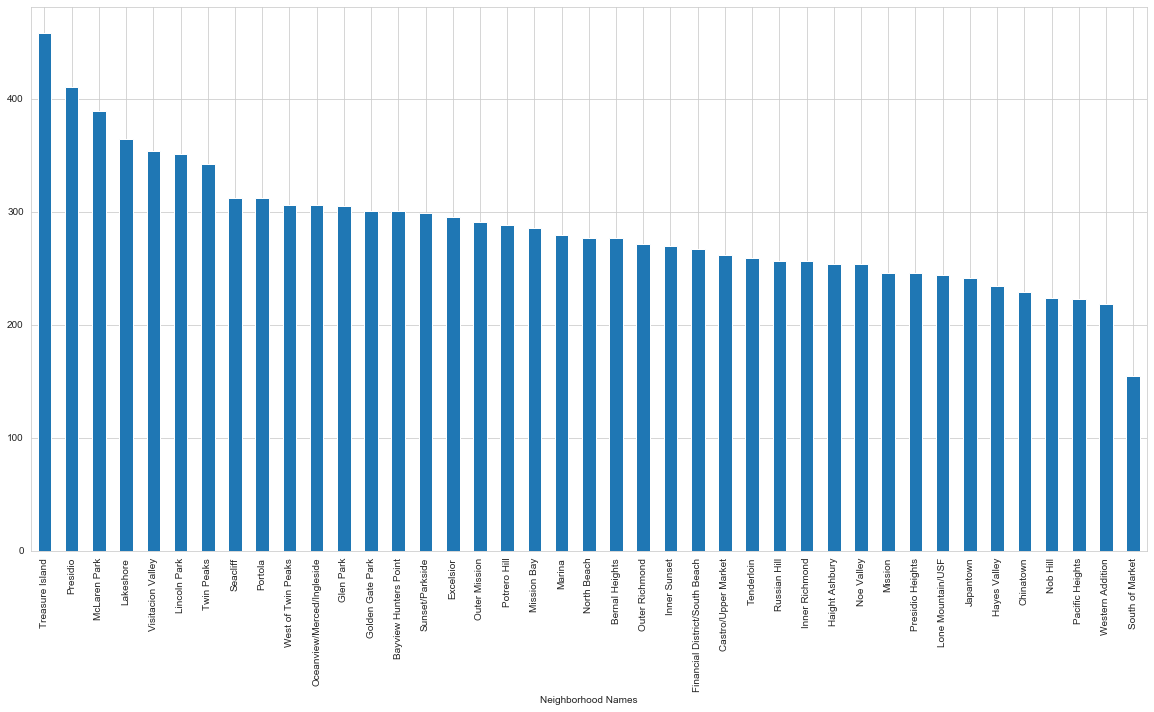

In [19]:
plt.figure(figsize=(20,10))
sorted_neighborhoodtimes_df['Travel Time'].astype('timedelta64[s]').plot(kind='bar')

In [20]:
count_of_call_by_hood = dropped2_calls_df.groupby('Neighborhood Names')['Travel Time'].count().sort_values(ascending=False)

In [21]:
count_of_call_by_hood

Neighborhood Names
Tenderloin                        92954
Mission                           66359
South of Market                   65012
Financial District/South Beach    44941
Bayview Hunters Point             41215
Sunset/Parkside                   31734
Western Addition                  28349
Nob Hill                          24151
Outer Richmond                    20144
Hayes Valley                      18525
West of Twin Peaks                18262
Castro/Upper Market               17303
Pacific Heights                   16454
Chinatown                         15555
Bernal Heights                    15285
Excelsior                         14935
North Beach                       14397
Marina                            14122
Potrero Hill                      13856
Inner Sunset                      12922
Outer Mission                     11809
Oceanview/Merced/Ingleside        11174
Lakeshore                         10999
Haight Ashbury                    10943
Russian Hill         

In [22]:
call_type_times = dropped2_calls_df.groupby('Call Type')['Travel Time'].mean(numeric_only=False)

In [23]:
count_of_type_of_calls = dropped2_calls_df.groupby('Call Type')['Travel Time'].count().sort_values(ascending=False)

In [25]:
count_of_type_of_calls_df = pd.DataFrame(count_of_type_of_calls)

In [26]:
count_of_type_of_calls_df

,Travel Time
Call Type,
Medical Incident,486485
Alarms,83817
Structure Fire,72571
Traffic Collision,31760
Citizen Assist / Service Call,13568
Other,10127
Outside Fire,9987
Gas Leak (Natural and LP Gases),3720
Vehicle Fire,3383


In [27]:
# let's sort from greatest to least
call_type_times_sorted = call_type_times.sort_values(ascending=False)

In [28]:
#make it into a df since it's easier
call_type_times_sorted_df = pd.DataFrame(call_type_times_sorted)

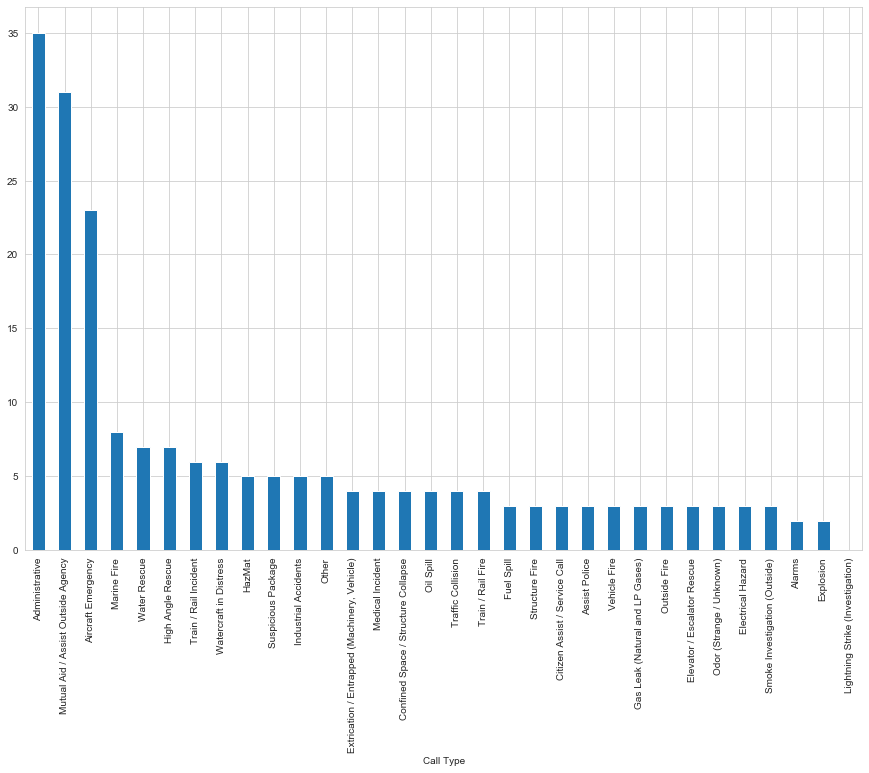

In [29]:
plt.figure(figsize=(15,10))
call_type_times_sorted_df['Travel Time'].astype('timedelta64[m]').plot(kind='bar')

In [35]:
#I want to map station addresses to the station so I can start understanding travel distances and times.
#i took this info from the sffd website and organized it a bit in excel.
station_addresses_df = pd.read_csv(r'C:/Users/douge/Python Notebooks/SanFran/station addresses.csv',names=['Station No.','Address'])

In [78]:
station_addresses_df.replace('\xa0','""',inplace=True)

In [79]:
station_addresses_dict = station_addresses_df.to_dict('list')

In [80]:
station_addresses_dict

{'Station No.': ['\xa0\xa0\xa0\xa0\xa0 \xa0Station 1',
  '\xa0\xa0\xa0\xa0\xa0\xa0 \xa0Station 2',
  '\xa0\xa0\xa0\xa0\xa0\xa0 \xa0Station 3',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0 Station 4',
  '\xa0\xa0\xa0\xa0\xa0 \xa0 Station 5\xa0',
  '\xa0\xa0\xa0\xa0 \xa0\xa0 Station 6',
  '\xa0\xa0\xa0\xa0\xa0 \xa0 Station 7',
  '\xa0\xa0\xa0\xa0\xa0 \xa0 Station 8',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Station 9',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Station 10',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Station 11',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Station 12',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Station 13',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Station 14',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Station 15',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Station 16\xa0',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Station 17',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Station 18',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Station 19',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Station 20',
  '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Station 21',
  '\xa0\xa0\xa0\xa

In [75]:
station_addresses_dict['Station No.'].replace('\xa0','""',inplace=True)

AttributeError: 'list' object has no attribute 'replace'

In [81]:
sta_no = pd.Series(station_addresses_dict['Station No.'])

In [83]:
sta_no_list = pd.Series.tolist(sta_no)

In [84]:
sta_no_list

['\xa0\xa0\xa0\xa0\xa0 \xa0Station 1',
 '\xa0\xa0\xa0\xa0\xa0\xa0 \xa0Station 2',
 '\xa0\xa0\xa0\xa0\xa0\xa0 \xa0Station 3',
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0 Station 4',
 '\xa0\xa0\xa0\xa0\xa0 \xa0 Station 5\xa0',
 '\xa0\xa0\xa0\xa0 \xa0\xa0 Station 6',
 '\xa0\xa0\xa0\xa0\xa0 \xa0 Station 7',
 '\xa0\xa0\xa0\xa0\xa0 \xa0 Station 8',
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Station 9',
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Station 10',
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Station 11',
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Station 12',
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Station 13',
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Station 14',
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Station 15',
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Station 16\xa0',
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Station 17',
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Station 18',
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Station 19',
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Station 20',
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Station 21',
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Station 22',
 '\xa0\

In [92]:
new_list = []
for i in sta_no_list:
    i = unicodedata.normalize("NFKC", i)
    i = i.strip()
    new_list.append(i)

In [93]:
new_list

['Station 1',
 'Station 2',
 'Station 3',
 'Station 4',
 'Station 5',
 'Station 6',
 'Station 7',
 'Station 8',
 'Station 9',
 'Station 10',
 'Station 11',
 'Station 12',
 'Station 13',
 'Station 14',
 'Station 15',
 'Station 16',
 'Station 17',
 'Station 18',
 'Station 19',
 'Station 20',
 'Station 21',
 'Station 22',
 'Station 23',
 'Station 24',
 'Station 25',
 'Station 26',
 'Station 28',
 'Station 29',
 'Station 31',
 'Station 32',
 'Station 33',
 'Station 34',
 'Station 35',
 'Station 36',
 'Station 37',
 'Station 38',
 'Station 39',
 'Station 40',
 'Station 41',
 'Station 42',
 'Station 43',
 'Station 44',
 'Station 48',
 'Station 49',
 'Station 51']

In [99]:
addresses_list = station_addresses_df['Address']

In [130]:
new_station_df = pd.DataFrame(new_list,station_addresses_df['Address'])

In [131]:
new_station_df=new_station_df.reset_index()

In [137]:
new_station_df

,Address,0
0,935 Folsom Street,Station 1
1,1340 Powell Street,Station 2
2,1067 Post Street,Station 3
3,449 Mission Rock,Station 4
4,1301 Turk Street,Station 5
5,135 Sanchez Street,Station 6
6,2300 Folsom Street,Station 7
7,36 Bluxome Street,Station 8
8,2245 Jerrold Avenue,Station 9
9,655 Presidio Avenue,Station 10


In [139]:
new_station_df = new_station_df[[0,'Address']]

In [152]:
new_station_df.rename(columns={0:'Station No'},inplace=True)

In [151]:
new_station_df

,0,Address
0,Station 1,935 Folsom Street
1,Station 2,1340 Powell Street
2,Station 3,1067 Post Street
3,Station 4,449 Mission Rock
4,Station 5,1301 Turk Street
5,Station 6,135 Sanchez Street
6,Station 7,2300 Folsom Street
7,Station 8,36 Bluxome Street
8,Station 9,2245 Jerrold Avenue
9,Station 10,655 Presidio Avenue


In [156]:
new_station_dict = new_station_df[['Station No','Address']].to_dict()

In [157]:
new_station_dict

{'Station No': {0: 'Station 1',
  1: 'Station 2',
  2: 'Station 3',
  3: 'Station 4',
  4: 'Station 5',
  5: 'Station 6',
  6: 'Station 7',
  7: 'Station 8',
  8: 'Station 9',
  9: 'Station 10',
  10: 'Station 11',
  11: 'Station 12',
  12: 'Station 13',
  13: 'Station 14',
  14: 'Station 15',
  15: 'Station 16',
  16: 'Station 17',
  17: 'Station 18',
  18: 'Station 19',
  19: 'Station 20',
  20: 'Station 21',
  21: 'Station 22',
  22: 'Station 23',
  23: 'Station 24',
  24: 'Station 25',
  25: 'Station 26',
  26: 'Station 28',
  27: 'Station 29',
  28: 'Station 31',
  29: 'Station 32',
  30: 'Station 33',
  31: 'Station 34',
  32: 'Station 35',
  33: 'Station 36',
  34: 'Station 37',
  35: 'Station 38',
  36: 'Station 39',
  37: 'Station 40',
  38: 'Station 41',
  39: 'Station 42',
  40: 'Station 43',
  41: 'Station 44',
  42: 'Station 48',
  43: 'Station 49',
  44: 'Station 51'},
 'Address': {0: '935 Folsom Street',
  1: '1340 Powell Street',
  2: '1067 Post Street',
  3: '449 Missi

In [121]:
new_station_df.to_dict()

{0: {'935 Folsom Street': 'Station 1',
  '1340 Powell Street': 'Station 2',
  '1067 Post Street': 'Station 3',
  '449 Mission Rock': 'Station 4',
  '1301 Turk Street': 'Station 5',
  '135 Sanchez Street': 'Station 6',
  '2300 Folsom Street': 'Station 7',
  '36 Bluxome Street': 'Station 8',
  '2245 Jerrold Avenue': 'Station 9',
  '655 Presidio Avenue': 'Station 10',
  '3880 26th Street': 'Station 11',
  '1145 Stanyan Street': 'Station 12',
  '530 Sansome Street': 'Station 13',
  '551 26th Avenue': 'Station 14',
  '1000 Ocean Avenue': 'Station 15',
  '2251 Greenwich Street': 'Station 16',
  '1295 Shafter Avenue': 'Station 17',
  '1935 32nd Avenue': 'Station 18',
  '390 Buckingham Way': 'Station 19',
  '285 Olympia Way': 'Station 20',
  '1443 Grove Street': 'Station 21',
  '1290 16th Avenue': 'Station 22',
  '1348 45th Avenue': 'Station 23',
  '100 Hoffman Avenue': 'Station 24',
  '3305 3rd Street': 'Station 25',
  '80 Digby Street': 'Station 26',
  '1814 Stockton Street': 'Station 28',
 

In [102]:
addresses_list = addresses_list.tolist()

In [112]:
keys = ['Station Area','Addresses']
values = [new_list,addresses_list]
station_dict = dict(zip(keys, values))

ValueError: dictionary update sequence element #0 has length 1; 2 is required

In [106]:
station_dict

{'Station Area': ['Station 1',
  'Station 2',
  'Station 3',
  'Station 4',
  'Station 5',
  'Station 6',
  'Station 7',
  'Station 8',
  'Station 9',
  'Station 10',
  'Station 11',
  'Station 12',
  'Station 13',
  'Station 14',
  'Station 15',
  'Station 16',
  'Station 17',
  'Station 18',
  'Station 19',
  'Station 20',
  'Station 21',
  'Station 22',
  'Station 23',
  'Station 24',
  'Station 25',
  'Station 26',
  'Station 28',
  'Station 29',
  'Station 31',
  'Station 32',
  'Station 33',
  'Station 34',
  'Station 35',
  'Station 36',
  'Station 37',
  'Station 38',
  'Station 39',
  'Station 40',
  'Station 41',
  'Station 42',
  'Station 43',
  'Station 44',
  'Station 48',
  'Station 49',
  'Station 51'],
 'Addresses': ['935 Folsom Street',
  '1340 Powell Street',
  '1067 Post Street',
  '449 Mission Rock',
  '1301 Turk Street',
  '135 Sanchez Street',
  '2300 Folsom Street',
  '36 Bluxome Street',
  '2245 Jerrold Avenue',
  '655 Presidio Avenue',
  '3880 26th Street',
  '

In [108]:
dropped2_calls_df['Station Address'] = dropped2_calls_df['Station Area'].map(station_dict)

C:\Users\douge\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [109]:
dropped2_calls_df['Station Address']

0         NaN
1         NaN
2         NaN
3         NaN
5         NaN
         ... 
999995    NaN
999996    NaN
999997    NaN
999998    NaN
999999    NaN
Name: Station Address, Length: 731189, dtype: object

In [110]:
dropped2_calls_df['Station Area']

0         48
1         48
2         48
3         11
5         05
          ..
999995    31
999996    44
999997    03
999998    01
999999    08
Name: Station Area, Length: 731189, dtype: string

In [201]:
dropped2_calls_df['Neighborhood Names']

0                        Treasure Island
1                        Treasure Island
2                        Treasure Island
3                         Bernal Heights
5                       Western Addition
                       ...              
999995                    Inner Richmond
999996                 Visitacion Valley
999997                          Nob Hill
999998                   South of Market
999999    Financial District/South Beach
Name: Neighborhood Names, Length: 731189, dtype: object

In [205]:
dropped2_calls_df['Fire Prevention District']

0         None
1         None
2         None
3            6
5            2
          ... 
999995       7
999996      10
999997       1
999998       3
999999       3
Name: Fire Prevention District, Length: 731189, dtype: object